In [1]:
from IPython.display import Image

Presentation, readability, tables, figures,       
description of aims and theory                         20

Methods. Appropriate numerics and correct coding       30

Correctness of results, solution of stated problem     30

Analysis and interpretation of results, conclusions    20

## Introduction

This report looks at both time and space differencing by considering a simplified version of the one dimensional diffusion equation with viscosity, $v_d$.

\begin{equation*}
\frac{\partial u(x,t}{\partial t}  
 = v_d\frac{\partial^2 u(x,t}{\partial x^2}
 \end{equation*}
 
 With initial condition $u(x,0)=  δ(x-0.5)$ and the boundary condition $u(0,t)=u(1,t)=0$. This gives the analytic solution,

\begin{equation*}
w(x,t) = 2\sum_{n=1}^{\infty} sin(\frac{\pi n}{2})sin(\pi n x) e^{\pi^{2}n^{2}v_d t}
 \end{equation*}

Applying first-order time differencing and second order order centered space, as used in the previous workshop, we obtain a simple scheme,

\begin{equation*}
u_j^{n+1} 
 = u_j^{n}+\frac{v_dΔt}{Δx^{2}}(u_{j+1}^{n}+u_{j-1}^{n}-2u_j^{n})
 \end{equation*}

We will use this to find a numerical solution to the simple diffusion equation.


## Methods

The code used to find the numerical solutions for each of these schemes were written in python storing the results in 2d arrays and visualising with use of matplotlib.pyplot. The full code used has been attached with comments as another html file to the submission bellow we summarise the methods as written in python. Where useful snippets of  code have been included in this report.

We first set up an array of between the positions 0,1 and find values for each interval $Δx$ for $u(x,0)$ using the analytic solution. We can then use our scheme to move the system forwards in time.

In [5]:
def explicit_first(u_array,j,delta_x,delta_t,v):
    # boundary conditions
    if j == 0:
        left = 0
        right = 1
    elif j == len(u_array)-1:
        left = j-1
        right = 1
    else:
        left = j-1
        right = j+1
    # this is just the equation for u_n+1 , j+1 = right, j-1 = left
    return u_array[j]+((v*delta_t)/(delta_x*delta_x))*(u_array[right]+u_array[left]-2*u_array[j])

We must consider both $Δx$ and $Δt$ when finding the stability of the scheme.

## Results

These results were obtained with the space steps $Δx=0.02$. As you can see the relative errors are already substantial when the analytic solution is close to zero. However the numerical solution with $Δx=0.02$ and  $Δt=0.2$ is in close agreement for the non zero values.

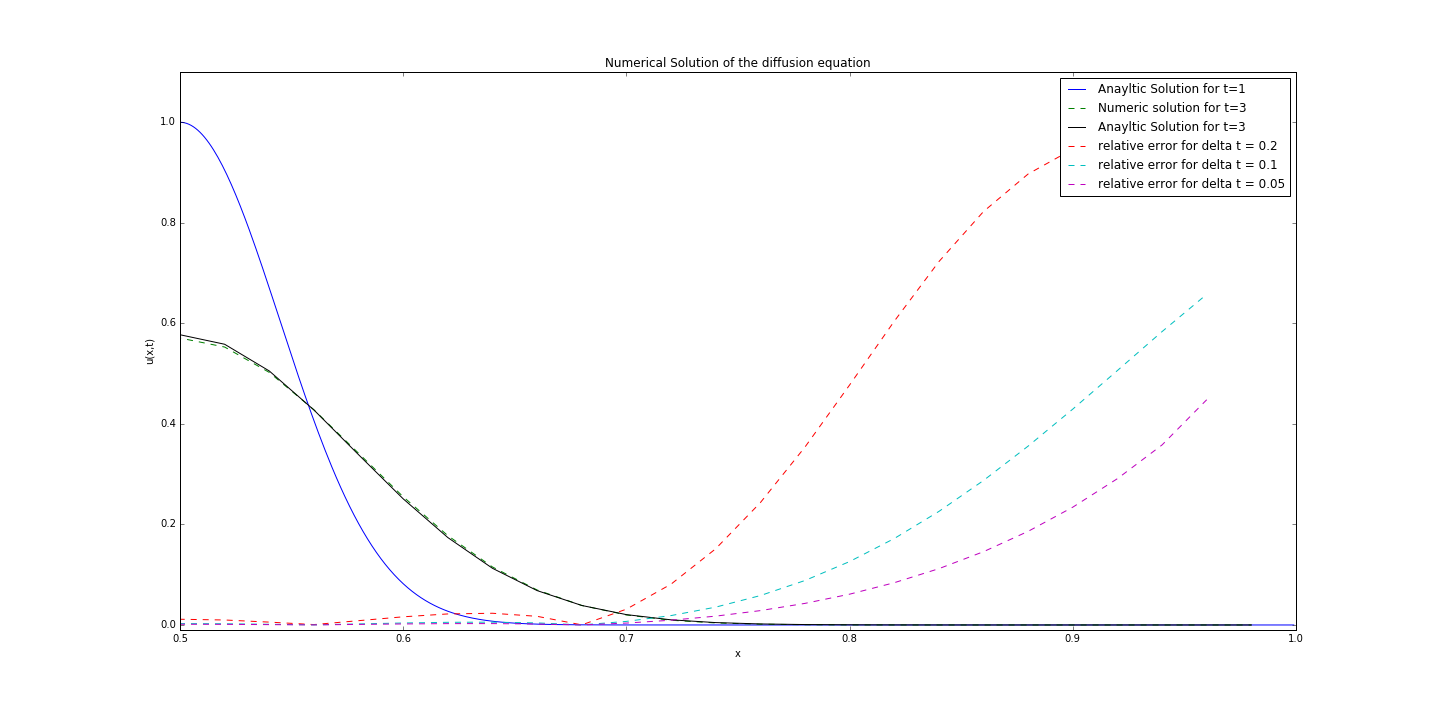

In [6]:
Image('NumericalSDiffusion.png')

Now we consider the error in different values of $Δx$, taking $Δt=0.2$. These errors are more substantial. Perhaps surprisingly the smallest time step gives the largest error. The stability requirement for this equation is, 

\begin{equation*}
Δt < \frac{1}{2} \frac{(Δx)^{2}}{v_d}
 \end{equation*}
 
Therefore for smaller $Δx$ this relation is no longer satisfied and we get the unstable behaviour as shown below.

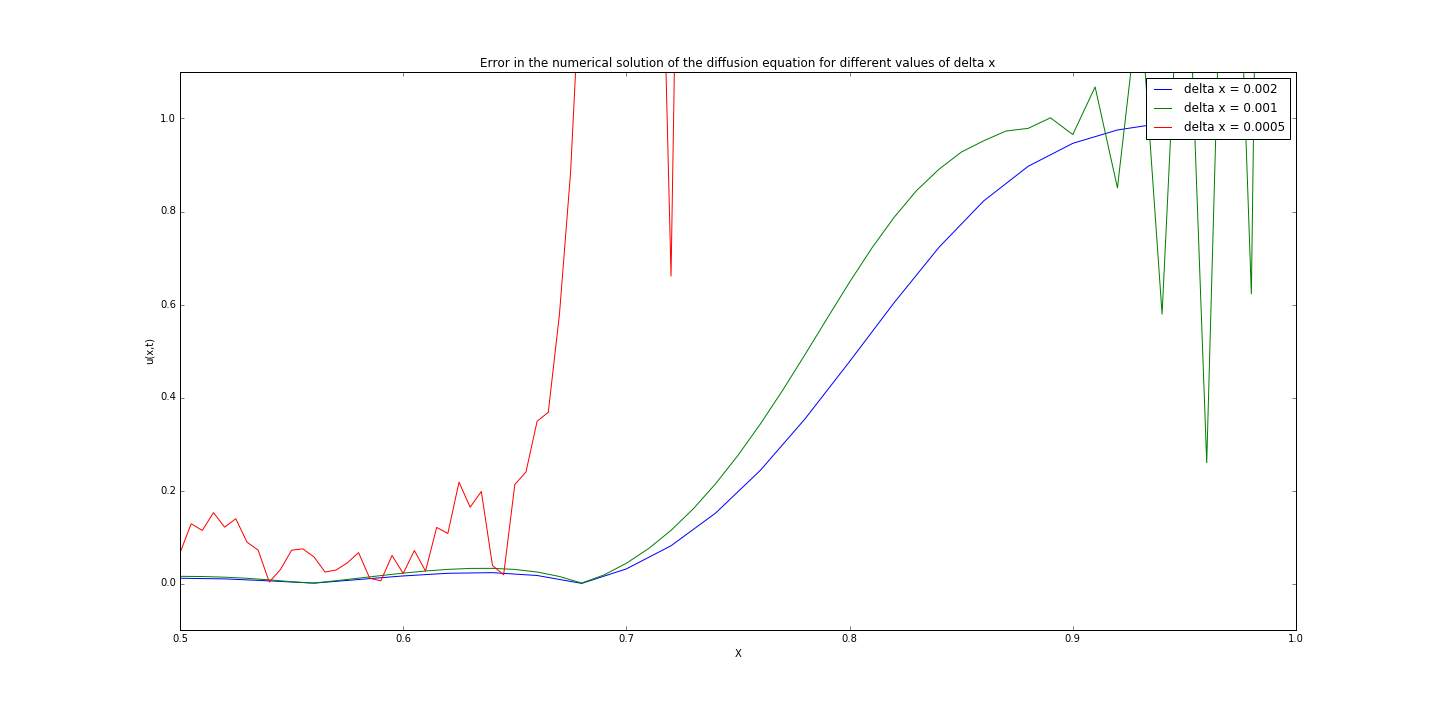

In [7]:
Image('errorDeltax.png')

## Conclusion

We have shown that both $Δx$ and $Δt$ must decrease simultaneously for the numerical solution to converge to the anayltical solution. Therefore being able to arbitrarily decrease $Δx$ is not useful, decreasing $Δt$ however will reduce the error until a point at which $Δx$ must be decreased to get a more accurate solution.

